<p align='center'>
  <img width='460' height='120' src='https://raw.githubusercontent.com/isalesp/SBTi/c6b056c600967afacb7f2a726e064f24615c1fec/DF737C44-1988-4B1E-8809-2D757052B543.png'>
</p>

## **Science-Based Targets initiative (SBTi), March 2022**


## **Executive Summary**

Through the 2015 Paris Agreement, world governments committed to limiting global temperature rise to well-below 2°C above pre-industrial levels and pursuing efforts to limit warming to 1.5°C. In 2018, the Intergovernmental Panel on Climate Change (IPCC) warned that global warming must not exceed 1.5°C above pre-industrial temperatures to avoid the catastrophic impacts of climate change. To achieve this, greenhouse gas (GHG) emissions must halve by 2030 – and drop to net zero by 2050.

The Science Based Targets initiative (SBTi) was founded to mobilize the private sector to set emissions reduction targets in line with climate science and play their part in accelerating this era-defining global effort.

Targets are considered ‘science-based’ if they are in line with what the latest climate science deems necessary to meet the goals of the Paris Agreement – limiting global warming to well-below 2°C above pre-industrial levels and pursuing efforts to limit warming to 1.5°C.

As of march 29th, 2022, a total of 2,735 companies have signed up to the SBTi. By using data provided by the SBTi we will conduct a descriptive analysis and try to identify trends.

## **Table of Contents**

1.   Environment
2.   Data
3.   Cleaning
4.   Exploratory Data Analysis (EDA)
5.   Conclusions
6.   References






## **Environment**

Before we start our analysis, let's initiate our environment. For this case, we will be using `pandas` and `numpy`for analysis and for visuals, `matplotlib`, `geopandas` and `folium`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

!pip install geopandas
import folium
import geopandas as gpd

Now to import our data, let´s store the path to the .xlsx file that contains the data from SBTi into the variable `url`. For this analysis, the .xlsx file was preloaded on a Github repository to facilitate access to data.


In [2]:
url= 'https://raw.githubusercontent.com/isalesp/SBTi/main/companies.xlsx'

To being able to work with our data it is necessary to use the `read_excel` function from pandas and store it in a new variable. This new variable named `data` will contain our dataframe with all columns and rows from our .xlsx file.

In [3]:
data= pd.read_excel(url)

## **Data**

Once we have uploaded our data, let´s start by reviewing some general aspects. We use `shape` from pandas and identify that our dataset contains 2,735 rows and 22 columns.

In [4]:
data.shape

(2735, 22)

To check how our dataset is organised and the data types that contains, we use `dtypes`. We see that some columns does not have the correct data type like Date which should be datatime64.

In [5]:
data.dtypes

Unnamed: 0                           float64
Unnamed: 1                           float64
Company Name                          object
ISIN                                  object
Near term - Target Status             object
Near term - Target Classification     object
Near term - Target Year               object
Long term - Target Status             object
Long term - Target Classification     object
Long term - Target Year               object
Net-Zero Committed                    object
Net-Zero Year                         object
Organization Type                     object
BA1.5?                                object
BA1.5 Date                            object
Country                               object
Region                                object
Sector                                object
Date                                  object
Target                                object
Target Classification                 object
Extension                             object
dtype: obj

Now let´s use `head` and review the first row. We see that the first two columns does not contain information and other columns present missing values identified by the word Nan (Not A number). We will cover these details when we start cleaning our dataset.

In [6]:
data.head(1)

,Unnamed: 0,Unnamed: 1,Company Name,ISIN,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,...,Organization Type,BA1.5?,BA1.5 Date,Country,Region,Sector,Date,Target,Target Classification,Extension
0,NaN,NaN,Studio XAG,NaN,Targets Set,Well-below 2°C,2030.0,NaN,NaN,NaN,...,Small or Medium Enterprise,No,NaN,Albania,Europe,Professional Services,01/01/2022,This target was approved using a streamlined t...,The targets covering greenhouse gas emissions ...,NaN


##**Cleaning**

As we identified before, we need to indicate the proper datatype for the column Date so we can work with this data. We use `to_datetime`.

In [7]:
data['Date']= pd.to_datetime(data['Date'])

Now let's drop the two first columns that does not contain information by using `dropna`.

In [8]:
data= data.dropna(how= 'all', axis= 'columns')

Let's check if changes were made by printing again dtypes.

In [9]:
data.dtypes

Company Name                                 object
ISIN                                         object
Near term - Target Status                    object
Near term - Target Classification            object
Near term - Target Year                      object
Long term - Target Status                    object
Long term - Target Classification            object
Long term - Target Year                      object
Net-Zero Committed                           object
Net-Zero Year                                object
Organization Type                            object
BA1.5?                                       object
BA1.5 Date                                   object
Country                                      object
Region                                       object
Sector                                       object
Date                                 datetime64[ns]
Target                                       object
Target Classification                        object
Extension   

We already know that some columns contain Nan values, although for this analysis we will only be focusing on some columns, let's check how many Nan values are in each column and if it is necessary to change it for data that suits our needs. For this we use `isnull` and `sum`. We see that columns: Near term - Target Status,  Net-Zero Committed, Organization Type,  Region, Sector and Date are complete so there is no need to modify them.


In [11]:
data.isnull().sum()

Company Name                            0
ISIN                                 1643
Near term - Target Status               0
Near term - Target Classification    1478
Near term - Target Year              1505
Long term - Target Status            2728
Long term - Target Classification    2728
Long term - Target Year              2727
Net-Zero Committed                      0
Net-Zero Year                        2728
Organization Type                       0
BA1.5?                                  0
BA1.5 Date                           1368
Country                                 0
Region                                  0
Sector                                  0
Date                                    1
Target                               1479
Target Classification                1483
Extension                            2554
dtype: int64

To review data for consistency and avoid duplicates or variations produced by typos. Let's use a `for loop` to only review the columns that we are interested in. First, we creat a list with the names of the columns we need and then, use a for loop to iterate over this list to count the number of values in each column. As result we have all columns grouped by unique values and the count of each one. It will be necessary to update some values like Targets set, 1.5°C/Well-below 2°C, europe, north America and Pharmaceuticals, Biotechnology and Life Sciences.

In [12]:
udc= ['Near term - Target Status', 'Near term - Target Classification',
      'Net-Zero Committed','Organization Type', 'Region', 'Sector'] 

for col in data[udc]:
    print(col)
    print(data[col].value_counts())
    print('\n')


Near term - Target Status
Committed      1479
Targets Set    1247
Targets set       9
Name: Near term - Target Status, dtype: int64


Near term - Target Classification
1.5°C                   883
Well-below 2°C          279
2°C                      94
1.5°C/Well-below 2°C      1
Name: Near term - Target Classification, dtype: int64


Net-Zero Committed
No     1775
Yes     960
Name: Net-Zero Committed, dtype: int64


Organization Type
Company                       2271
Small or Medium Enterprise     323
Financial Institution          141
Name: Organization Type, dtype: int64


Region
Europe           1526
Asia              561
North America     455
Latin America      92
Oceania            75
Africa             24
europe              1
north America       1
Name: Region, dtype: int64


Sector
Professional Services                                                                                                       234
Food and Beverage Processing                                          

By using `loc` we locate in each column the data we want to update and modify the content to be consistent.

In [13]:
data.loc[data['Near term - Target Status']== 'Targets set', 'Near term - Target Status'] = 'Targets Set'
data.loc[data['Near term - Target Classification']== '1.5°C/Well-below 2°C', 'Near term - Target Classification'] = '1.5°C'
data.loc[data['Region']== 'europe', 'Region'] = 'Europe'
data.loc[data['Region']== 'north America', 'Region'] = 'North America'
data.loc[data['Sector']== 'Pharmaceuticals, Biotechnology and Life Sciences', 'Sector'] = 'Pharmaceuticals, Biotechnology and Life'


## **Exploratory Data Analysis (EDA)**

###**Location**

Once our data is clean we proceed to perform our exploratory analysis. We will start by organising the data to identify the number of companies that have set Science Based Targets by region. We use `groupby` from pandas to group our dataset by Region and then count the number of companies for each region. To diferentiate between companies that have set targets and those who are committed, we use `unstack` on Target Status. Then we plot our results in a bar chart using matplolib. We can see that Europe is the region with the largest number of companies setting SBTs, followed by Asia and Nort America.

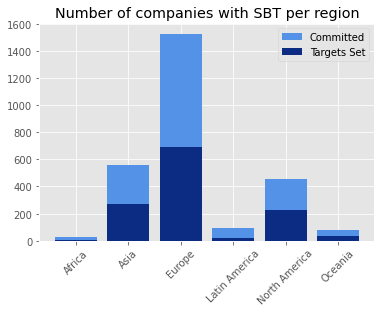

In [14]:
tb1= data.groupby(['Region', 'Near term - Target Status'])['Company Name'].count().unstack('Near term - Target Status')
tb1= tb1.rename_axis(None, axis= 1).reset_index()

fig, re= plt.subplots()

re.bar(tb1['Region'], tb1['Targets Set'], label= 'Targets Set', color= '#0c2c84')
re.bar(tb1['Region'], tb1['Committed'], bottom= tb1['Targets Set'], label= 'Committed', color= '#5492E8')

re.set_title('Number of companies with SBT per region')
re.set_ylabel('')
re.tick_params(axis= 'x', rotation= 45)
re.legend()
h, l= re.get_legend_handles_labels()
re.legend(h[::-1], l[::-1])


Now let's find out which are the top ten countries with the larger number of companies with SBTs. We use `groupby` to group our data by Country and then, count the number of companies in each country, finally we sort the results in descending order using `sort_values` and print only the first 10 results. As expected from the previous graph, almost all contries are located in Europe.

In [15]:
tb2= data.groupby(['Country'])['Company Name'].count()
tb2= tb2.to_frame(name= 'Number of Companies').reset_index()
ttc= tb2.sort_values(by= ['Number of Companies'], ascending= False).head(10)
ttc

,Country,Number of Companies
69,United Kingdom (UK),483
70,United States of America (USA),401
32,Japan,209
20,France,146
61,Sweden,143
21,Germany,138
44,Netherlands,78
16,Denmark,78
27,India,71
62,Switzerland,71


To get a complete view on how companies are distributed around the world, we will create a choropleth map using `folium` and `geopandas`. First, we use `read_file` from geopandas to read the geodataframe included in geopandas which contains all the geographic information of each country in the world.

In [16]:
world_geo= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Before we can plot our data we must verify that the country names that we have in our dataset can be matched with those in our geodataframe. So we use `merge` to join both datasets on country/name and set how as `outer`, this way we can combine all the rows for left and right dataframes with NaN when there are no matched values. Then, to find values that were not identified we look for Nan values in the geometry column. As result we found that 11 contries were not identified on the geopandas file.

In [17]:
nid= pd.merge(world_geo, tb2, left_on= 'name', right_on= 'Country', how= 'outer')
nid= nid[nid.geometry.isnull()]
nid

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Number of Companies
177,NaN,NaN,NaN,NaN,NaN,None,Bermuda,3.0
178,NaN,NaN,NaN,NaN,NaN,None,Czech Republic,2.0
179,NaN,NaN,NaN,NaN,NaN,None,Hong Kong,31.0
180,NaN,NaN,NaN,NaN,NaN,None,Jersey,1.0
181,NaN,NaN,NaN,NaN,NaN,None,Malta,1.0
182,NaN,NaN,NaN,NaN,NaN,None,Mauritius,3.0
183,NaN,NaN,NaN,NaN,NaN,None,Singapore,18.0
184,NaN,NaN,NaN,NaN,NaN,None,"Taiwan, Province of China",40.0
185,NaN,NaN,NaN,NaN,NaN,None,United Arab Emirates (UAE),8.0
186,NaN,NaN,NaN,NaN,NaN,None,United Kingdom (UK),483.0


Then, we will use `replace` to change the name of 5 countries this way they will be found in the geodataframe.
The rest (6) are not included in our geodataframe for this reason it is not possibe to update them.

In [18]:
tb2_1= tb2.replace({ 'Country' : { 
    'Czech Republic':'Czechia',
    'Taiwan, Province of China': 'Taiwan',
    'United Arab Emirates (UAE)': 'United Arab Emirates',
    'United Kingdom (UK)': 'United Kingdom',
    'United States of America (USA)': 'United States of America'}})


Now we merge both datasets and set how as `inner` to obtain only rows that have a matched. Finally, we eliminate those countries that does not have companies with SBTs.

In [19]:
tb3= world_geo.merge(tb2_1, left_on= 'name', right_on= 'Country', how= 'inner')
tb3= tb3.dropna(subset= ['Number of Companies'])
   

We use `folium` to creat our choropleth map.
Note: In our geodataframe were not found Bermuda, Hong Kong, Jersey, Malta, Mauritius and Singapore, but these countries do have companies with SBTs.

In [20]:
world_map= folium.Map(location= [0, 0], zoom_start= 1)
world_map.choropleth(
    geo_data= tb3,
    data= tb3,
    columns= ['Country', 'Number of Companies'],
    key_on= 'feature.properties.name',
    fill_color= 'YlGnBu', 
    fill_opacity= 0.7, 
    line_opacity= 0.2,
    legend_name = 'Number of companies with SBTs per country',
)

style_function= 'font-size : 15px; fond-weight: bold'

world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


###**Registries**

Now let's see how companies have been setting SBTs over time. First, because we have our dates on a day-month-year format and we only need the year, we creat a new column and use `dt.year` to access the year. Then we use groupby and plot our results. Aditionally we creat two new columns each one with the acumulative sum of companies per year using `cumsum` and plot the result with lines. We see that the number of companies setting SBTs has been growing steadily since 2015. Although there is an importat difference between companies with targets set and companies committed. It is expected that companies committed will transition to companies with targets set.  

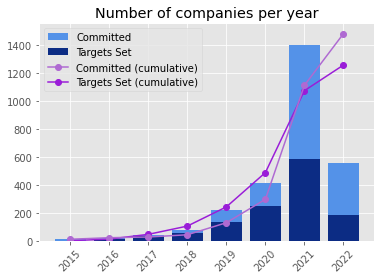

In [21]:
data['Year']= data['Date'].dt.year

yrs= data.groupby(['Year','Near term - Target Status'])['Company Name'].count().unstack()
yrs= yrs.rename_axis(None, axis= 1).reset_index()

yrs['Cum Tar']= yrs['Targets Set'].cumsum()
yrs['Cum Com']= yrs['Committed'].cumsum()

fig, yr= plt.subplots()

yr.bar(yrs['Year'], yrs['Targets Set'], label= 'Targets Set', color= '#0c2c84')
yr.bar(yrs['Year'], yrs['Committed'], bottom= yrs['Targets Set']  ,label = 'Committed', color= '#5492E8')
yr.plot(yrs['Year'], yrs['Cum Tar'], label= 'Targets Set (cumulative)', marker= 'o', color= '#9A1DD8')
yr.plot(yrs['Year'], yrs['Cum Com'], label= 'Committed (cumulative)', marker= 'o', color= '#AF6AD2')

yr.set_title('Number of companies per year')
yr.set_ylabel('')
yr.tick_params(axis= 'x', rotation= 45)
yr.legend()
h, l= yr.get_legend_handles_labels()
yr.legend(h[::-1], l[::-1])


###**Target Status**

As we can see from charts above there is growing interest from companies around the world in setting targets. As of March 29th 2022, SBTi have already listed 2,735 companies. Let's check their status. As we did before, it is necessary to diferentiate between those with targets set and those that have shown intention by committing targets.We group by Target Status and plot our result in a pie chart. 

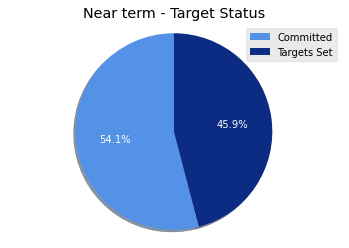

In [22]:
tb5= data.groupby(['Near term - Target Status'])['Company Name'].count()
tb5= tb5.to_frame(name= 'Number of Companies').reset_index()

fig, sts= plt.subplots()
sts.pie(x= 'Number of Companies', labels= 'Near term - Target Status', 
        data= tb5, labeldistance= None, autopct='%1.1f%%', shadow= True, 
        startangle= 90, colors= ['#5492E8', '#0c2c84'], textprops= dict(color= 'w'))
sts.axis('equal')
sts.set_title('Near term - Target Status')
sts.legend()


Now for companies with targets set , let's explore to which scenario their targets are aligned. From companies with targets set we identified that they are mostly aligned with 1.5C scenario which indicates that these companies are expecting to halve their emissions by 2030. To start creating our chart we use groupby and then we select results in which the target status is equal to targets set and finally, we plot our results in a bar chart.

Text(0.5, 1.0, 'Targets Set - Target Classification')

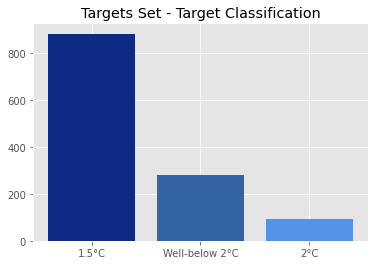

In [23]:
tgsce1= data.groupby(['Near term - Target Status','Near term - Target Classification'])['Company Name'].count()
tgsce1= tgsce1.reset_index(name= 'Number of Companies')
tgsce1= tgsce1[tgsce1['Near term - Target Status'] == 'Targets Set'].sort_values(by= 'Number of Companies', ascending= False)

fig, scen= plt.subplots()

scen.bar(data= tgsce1, height= 'Number of Companies', 
         x= 'Near term - Target Classification', 
         label= 'Near term - Target Classification', 
         color= ['#0c2c84', '#3564a6', '#5492E8'])

scen.set_title('Targets Set - Target Classification')


### **Organisation Type**

Now let's see how targets are distributed according to the type of organisation. Our dataset contains 3 types of organisations: Company, Small or Medium Size and Financial Institution. On the next graph we show the number of companies for each type of organisation and their target status. First, we group our data by Target Status and Organisation Type. We use unstack to change how our data is organised and then we plot our results. From this chart we can see that most targets come from larger companies, followed by SMEs and Financial Institutions. According to SME Climate Hub, SMEs comprise 90% of companies worldwide and have a key participation in the supply chain for larger companies, so it is important to increase the number of SMEs as soon as possible.

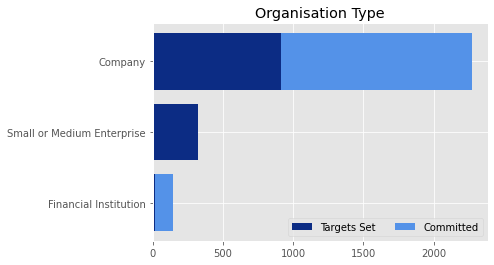

In [24]:
tb8= data.groupby(['Near term - Target Status','Organization Type'])['Company Name'].count().unstack('Near term - Target Status')
tb8= tb8.rename_axis(None, axis= 1).reset_index()
tb8= tb8.fillna(0).sort_values(by= ['Targets Set'])

fig, orty = plt.subplots()

orty.barh(tb8['Organization Type'], tb8['Targets Set'], label= 'Targets Set', color= '#0c2c84', align='center')
orty.barh(tb8['Organization Type'], tb8['Committed'], left= tb8['Targets Set'], label= 'Committed', color= '#5492E8', align='center')

orty.set_title('Organisation Type')
orty.set_ylabel('')
orty.legend(loc= 'lower right', ncol= 2) 


### **Sectors**

In this section we will explore which sectors present the larger number of companies and how this vary according to their targets status and location. First, we want to know which are the top ten sectors with the larger number of companies without considering their target status. Here, we use groupby, sort values in descending order and keep only the first 10 sectors with more companies. We plot our results in a donut chart. 

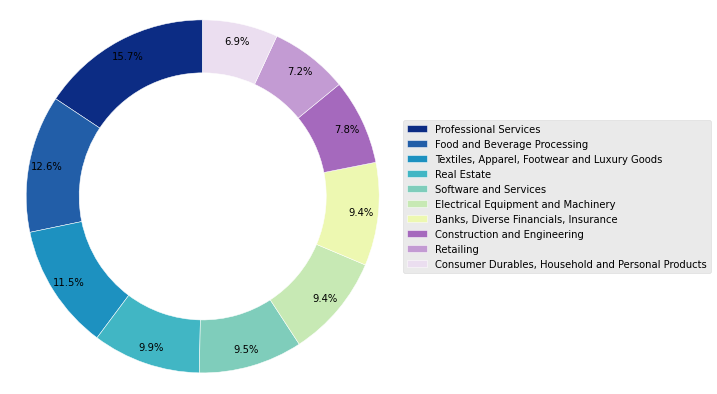

In [25]:
st= data.groupby(['Sector'])['Company Name'].count()
st= st.reset_index(name= 'Number of Companies').sort_values(by= ['Number of Companies'], ascending= False).head(10)

colors= ['#0c2c84','#225ea8','#1d91c0', '#41b6c4', '#7fcdbb',
         '#c7e9b4', '#edf8b1','#A569BD', '#C39BD3','#EBDEF0']

fig, stpi= plt.subplots(figsize= (7,7))
stpi.pie(x= 'Number of Companies', labels= 'Sector', 
        data= st, autopct= '%1.1f%%', pctdistance= 0.9, labeldistance= None, shadow= False, 
        startangle= 90, colors= colors, textprops= dict(color= 'k'), wedgeprops= dict(width= 0.3, edgecolor= 'w'))
stpi.axis('equal')
stpi.legend(loc= 'center left', bbox_to_anchor= (1, 0, 0.5, 1))


Now let's see all sectors by their target status. We group by Sector and Target Status, use `fillna` to fill with cero values that were not found and sort values in descending order. Then, we plot results in a horizontal bar chart.

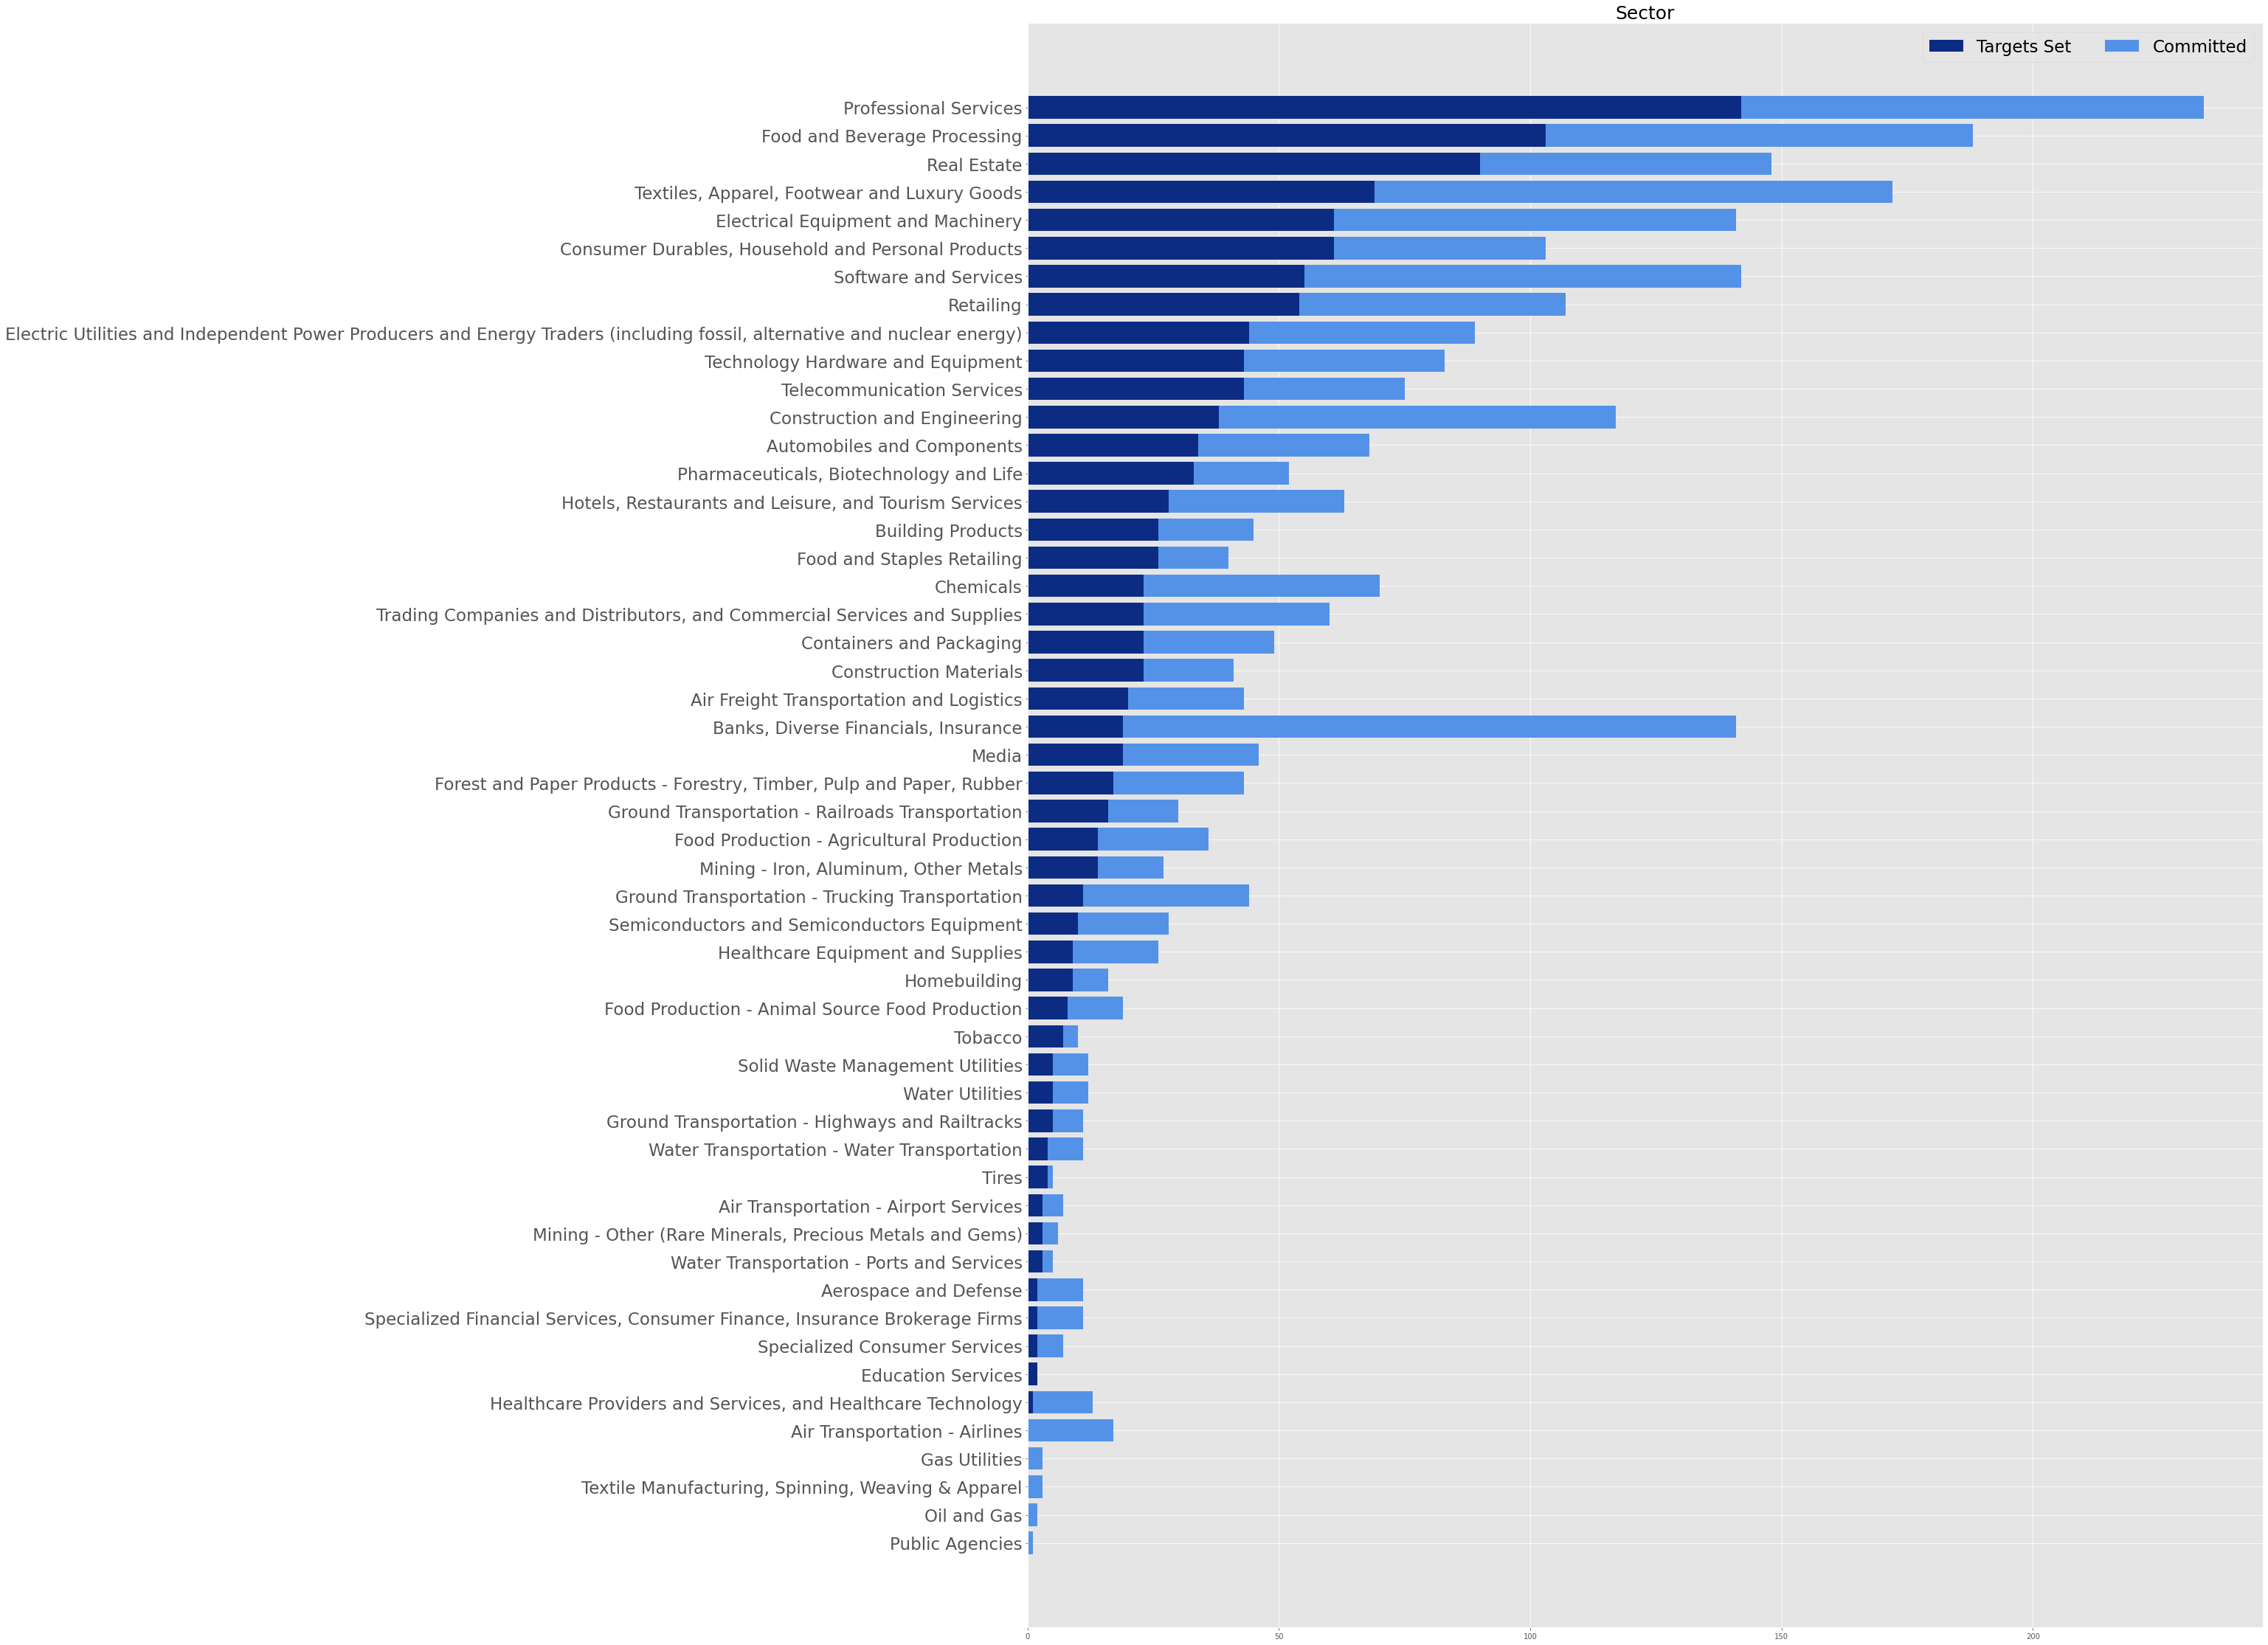

In [27]:
st0= data.groupby(['Sector', 'Near term - Target Status'])['Company Name'].count().unstack('Near term - Target Status')
st0= st0.rename_axis(None, axis= 1).reset_index()
st0= st0.fillna(0).sort_values(by= ['Targets Set', 'Committed'], ascending= [False, False])

fig, sectc= plt.subplots(figsize= (30,40))

sectc.barh(st0['Sector'], st0['Targets Set'], label= 'Targets Set', color= '#0c2c84', align= 'center')
sectc.barh(st0['Sector'], st0['Committed'], left= st0['Targets Set'], label= 'Committed', color= '#5492E8', align='center')

sectc.set_title('Sector', fontsize= 25)
sectc.set_ylabel('')
sectc.set_yticklabels(st0['Sector'], fontsize= 23)
sectc.legend(loc= 'upper right', ncol= 2, fontsize= 23) 
sectc.invert_yaxis()


For the next chart we want to see which sectors are predominat in each region and look for similarities if applicable. We group by Region, Sector and Target Status then, we use unstack to organise our results in a more manageable way. Then, we fill with cero values that were not found and sort values in descending order. To plot our data first, we creat a new dataset for each country using loc. Finally, we proceed to plot each chart in their corresponding axes.

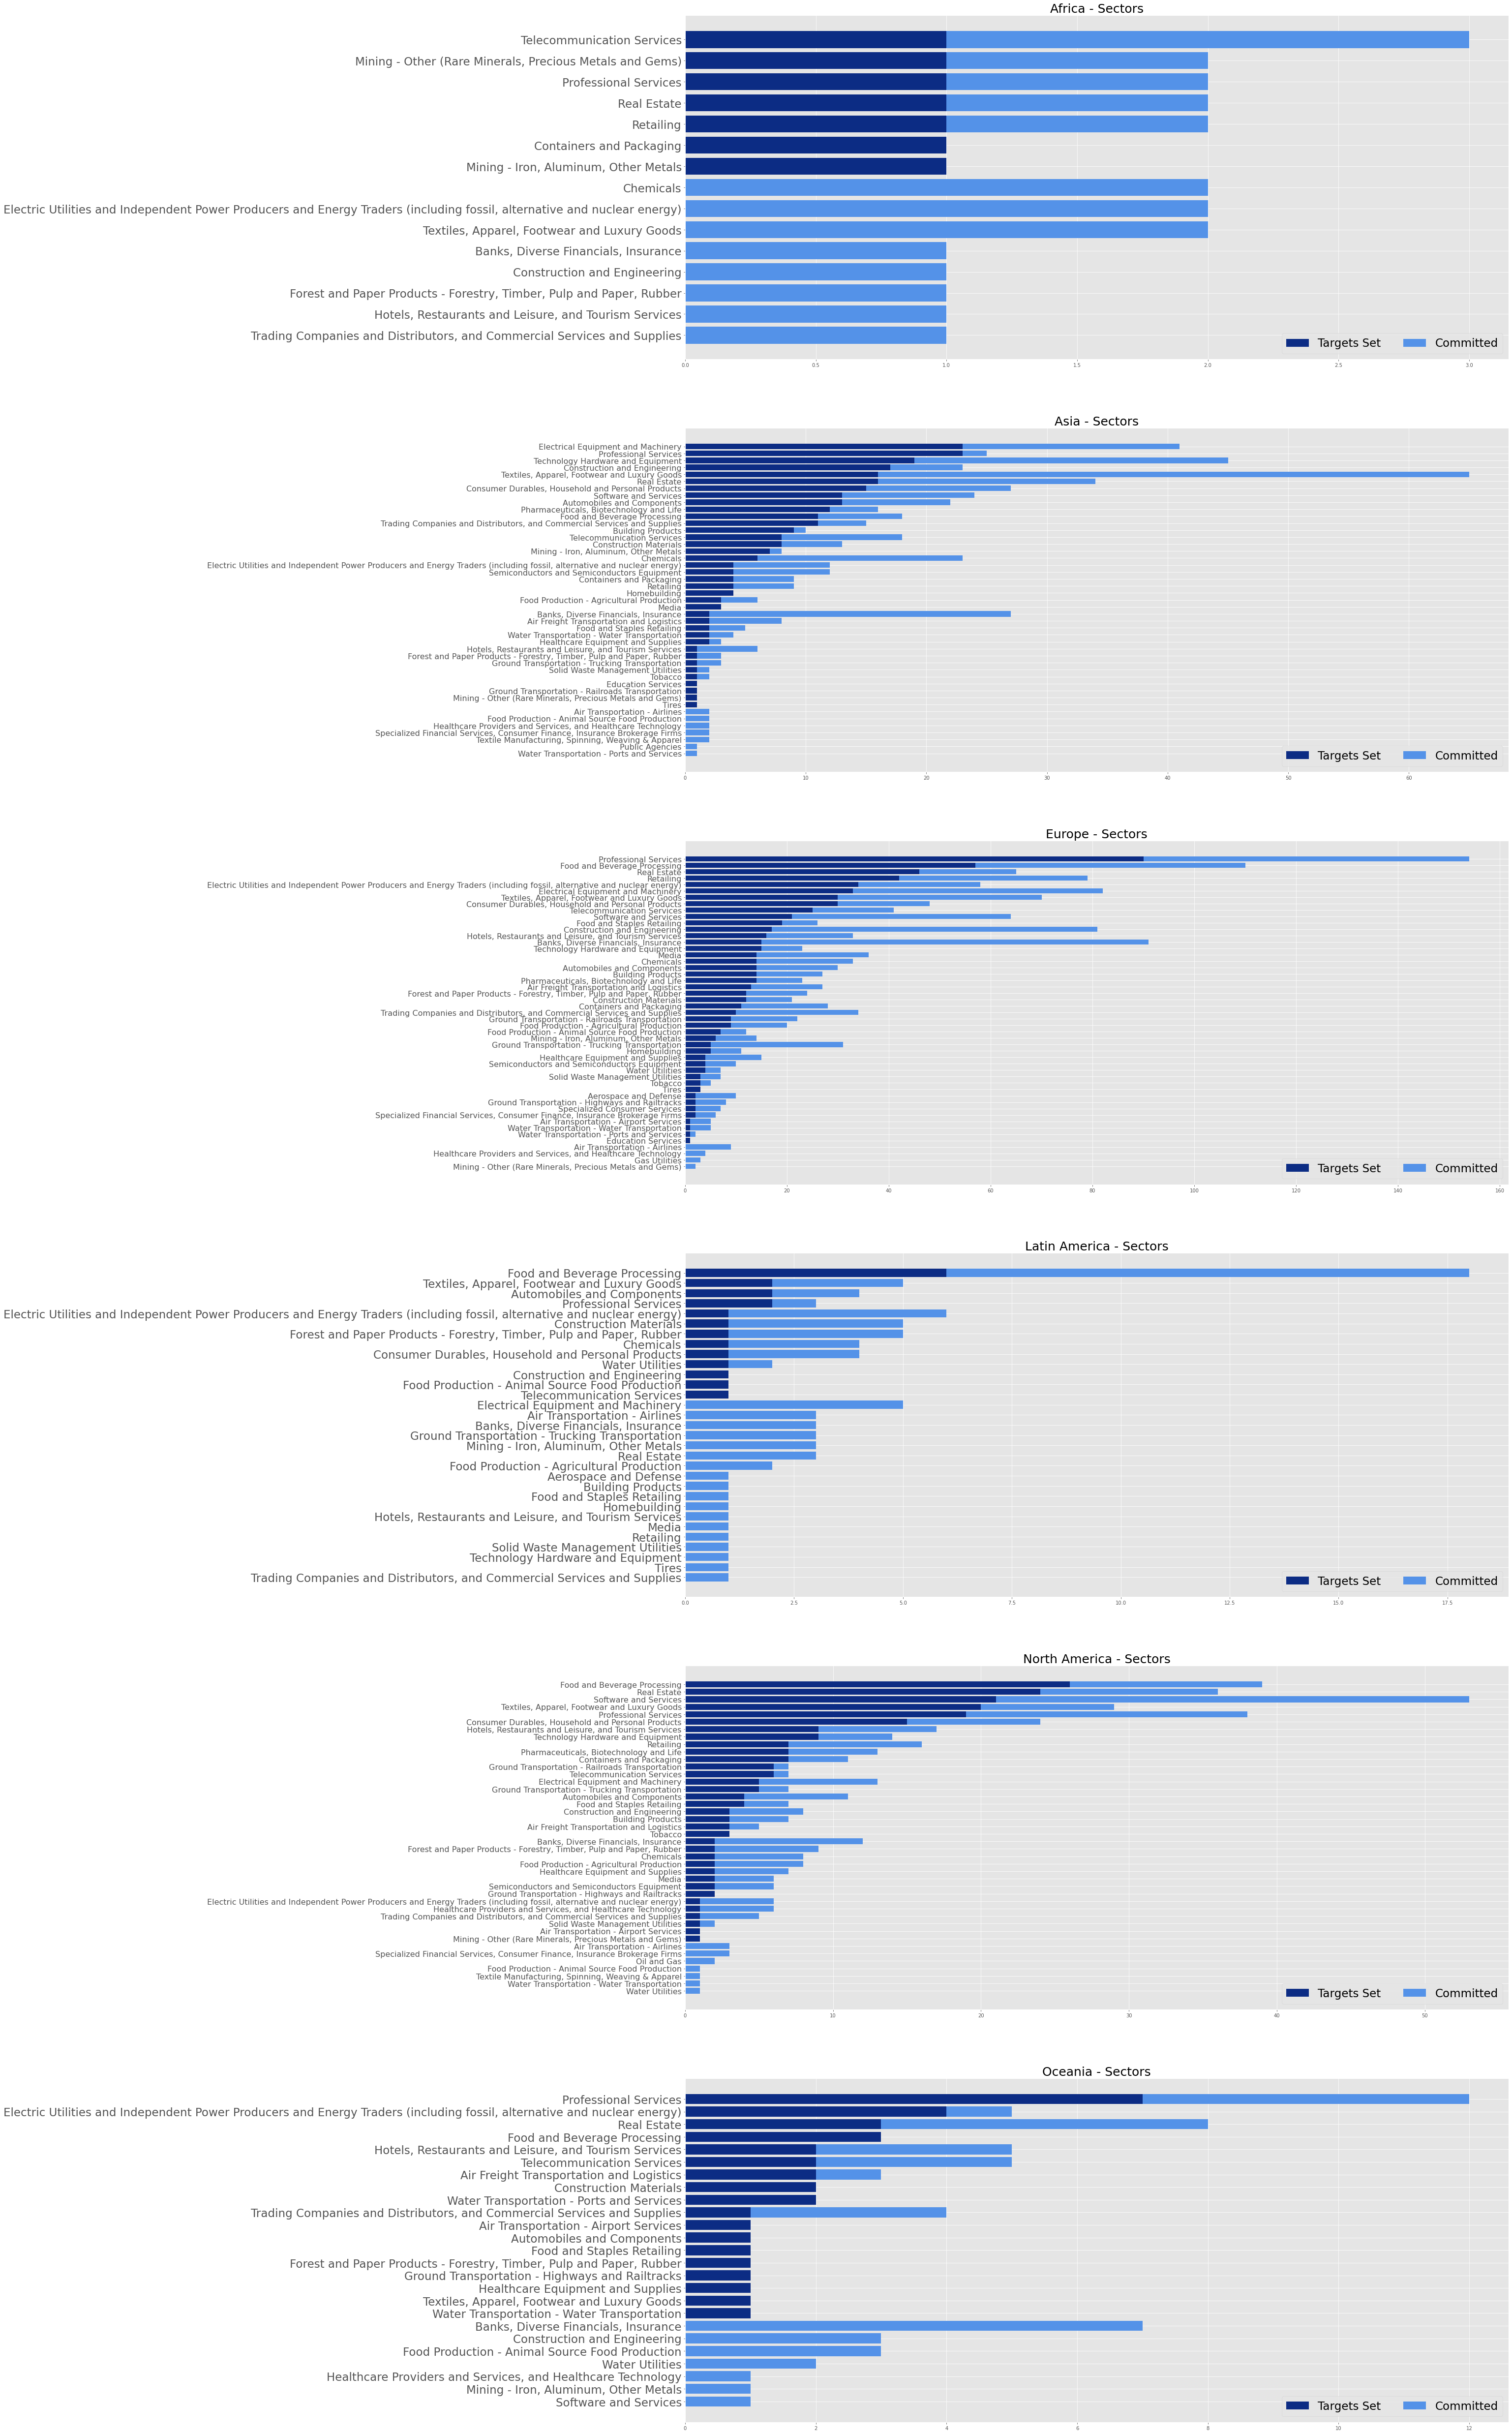

In [29]:
st2= data.groupby(['Region','Sector', 'Near term - Target Status'])['Company Name'].count().unstack('Near term - Target Status')
st2= st2.rename_axis(None, axis= 1).reset_index()
st2= st2.fillna(0).sort_values(by= ['Region', 'Targets Set', 'Committed'], ascending= [True,False, False])

afr= st2.loc[st2['Region'] == 'Africa']
asi= st2.loc[st2['Region'] == 'Asia']
eur= st2.loc[st2['Region'] == 'Europe']
lat= st2.loc[st2['Region'] == 'Latin America']
nam= st2.loc[st2['Region'] == 'North America']
oce= st2.loc[st2['Region'] == 'Oceania']

fig, sreg= plt.subplots(6, 1, figsize= (30,90))

sreg[0].barh(afr['Sector'], afr['Targets Set'], label= 'Targets Set', color= '#0c2c84', align= 'center')
sreg[0].barh(afr['Sector'], afr['Committed'], left= afr['Targets Set'], label= 'Committed', color= '#5492E8', align='center')
sreg[0].set_title('Africa - Sectors', fontsize=25)
sreg[0].set_ylabel('')
sreg[0].set_yticklabels(afr['Sector'], fontsize= 23)
sreg[0].legend(loc= 'lower right', ncol= 2, fontsize= 23) 
sreg[0].invert_yaxis()

sreg[1].barh(asi['Sector'], asi['Targets Set'], label= 'Targets Set', color= '#0c2c84', align= 'center')
sreg[1].barh(asi['Sector'], asi['Committed'], left= asi['Targets Set'], label= 'Committed', color= '#5492E8', align='center')
sreg[1].set_title('Asia - Sectors', fontsize=25)
sreg[1].set_ylabel('')
sreg[1].set_yticklabels(asi['Sector'], fontsize= 16)
sreg[1].legend(loc= 'lower right', ncol= 2, fontsize= 23) 
sreg[1].invert_yaxis()

sreg[2].barh(eur['Sector'], eur['Targets Set'], label= 'Targets Set', color= '#0c2c84', align= 'center')
sreg[2].barh(eur['Sector'], eur['Committed'], left= eur['Targets Set'], label= 'Committed', color= '#5492E8', align='center')
sreg[2].set_title('Europe - Sectors', fontsize=25)
sreg[2].set_ylabel('')
sreg[2].set_yticklabels(eur['Sector'], fontsize= 16)
sreg[2].legend(loc= 'lower right', ncol= 2, fontsize= 23) 
sreg[2].invert_yaxis()

sreg[3].barh(lat['Sector'], lat['Targets Set'], label= 'Targets Set', color= '#0c2c84', align= 'center')
sreg[3].barh(lat['Sector'], lat['Committed'], left= lat['Targets Set'], label= 'Committed', color= '#5492E8', align='center')
sreg[3].set_title('Latin America - Sectors', fontsize=25)
sreg[3].set_ylabel('')
sreg[3].set_yticklabels(lat['Sector'], fontsize= 23)
sreg[3].legend(loc= 'lower right', ncol= 2, fontsize= 23) 
sreg[3].invert_yaxis()

sreg[4].barh(nam['Sector'], nam['Targets Set'], label= 'Targets Set', color= '#0c2c84', align= 'center')
sreg[4].barh(nam['Sector'], nam['Committed'], left= nam['Targets Set'], label= 'Committed', color= '#5492E8', align='center')
sreg[4].set_title('North America - Sectors', fontsize=25)
sreg[4].set_ylabel('')
sreg[4].set_yticklabels(nam['Sector'], fontsize= 16)
sreg[4].legend(loc= 'lower right', ncol= 2, fontsize= 23) 
sreg[4].invert_yaxis()

sreg[5].barh(oce['Sector'], oce['Targets Set'], label= 'Targets Set', color= '#0c2c84', align= 'center')
sreg[5].barh(oce['Sector'], oce['Committed'], left= oce['Targets Set'], label= 'Committed', color= '#5492E8', align='center')
sreg[5].set_title('Oceania - Sectors', fontsize=25)
sreg[5].set_ylabel('')
sreg[5].set_yticklabels(oce['Sector'], fontsize= 23)
sreg[5].legend(loc= 'lower right', ncol= 2, fontsize= 23) 
sreg[5].invert_yaxis()


### **Net-Zero**

Now let's see the disposition of companies to achieve Net Zero by 2050. As mentioned before our data contains 2,735 companies, from which we observe only 35% are willing to commit to Net Zero by 2050. Here, we group our data by Net-Zero and count the number of companies. Then we plot using a pie chart. 

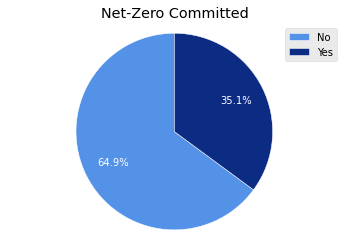

In [30]:
tb6= data.groupby(['Net-Zero Committed'])['Company Name'].count()
tb6= tb6.to_frame(name= 'Number of Companies').reset_index()

fig, nzs= plt.subplots()
nzs.pie(x= 'Number of Companies', labels= 'Net-Zero Committed', 
        data= tb6, labeldistance= None, autopct='%1.1f%%', pctdistance= 0.7, 
        shadow= False, startangle= 90, colors= ['#5492E8', '#0c2c84'], 
        textprops= dict(color= 'w'), wedgeprops= dict(edgecolor= 'w'))

nzs.axis('equal')
nzs.set_title('Net-Zero Committed')
nzs.legend()


Let's see if there is differences depending on each organisation type. For this we creat a nested donut chart showing in the first donut Organisation Type and in the second donut Net-Zero. We see that we got same results as in the previous graph, there is not difference between organisations. 

[Text(0.5, 1.0, 'Organization Type - Net Zero'), None]

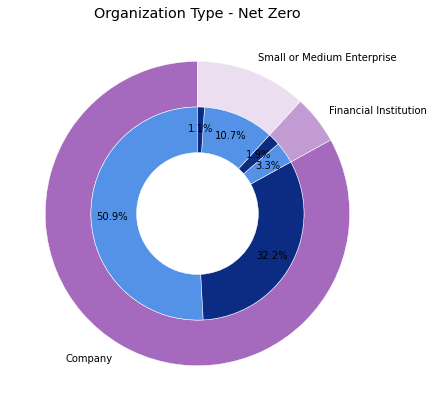

In [31]:
outer= data.groupby('Organization Type')['Company Name'].count()
inner= data.groupby(['Organization Type','Net-Zero Committed'])['Company Name'].count()

inner_labels= inner.index.get_level_values(1)

size= 0.3
fig, suppy= plt.subplots(figsize= (7,7))

suppy.pie(outer.values.flatten(), radius=1,
       labels=outer.index, startangle= 90, wedgeprops=dict(width=size, edgecolor='w'), 
       colors= ['#A569BD', '#C39BD3','#EBDEF0'])

suppy.pie(inner.values.flatten(), radius=1-size, 
       labels = inner_labels, labeldistance= None, startangle= 90, autopct='%1.1f%%',
       pctdistance= 0.8, wedgeprops=dict(width=size, edgecolor='w'), colors = ['#5492E8', '#0c2c84'])

suppy.set(aspect="equal", title='Organization Type - Net Zero')


In the next table we want to show which sectors have more companies interested in achieving Net-Zero by 2050. We creat a table and count the number of companies committed or not to achieve Net-Zero and sort in descending order the column with companies committed to Net-Zero. 

In [32]:
asnz= data.groupby(['Sector', 'Net-Zero Committed',])['Company Name'].count().unstack()
asnz= asnz.rename_axis(None, axis= 1).reset_index()
asnz= asnz.fillna(0).sort_values(by= 'Yes', ascending= False)
asnz

,Sector,No,Yes
33,Professional Services,141.0,93.0
45,"Textiles, Apparel, Footwear and Luxury Goods",102.0,70.0
38,Software and Services,78.0,64.0
14,Electrical Equipment and Machinery,87.0,54.0
17,Food and Beverage Processing,135.0,53.0
9,Construction and Engineering,67.0,50.0
5,"Banks, Diverse Financials, Insurance",91.0,50.0
35,Real Estate,112.0,36.0
10,"Consumer Durables, Household and Personal Prod...",69.0,34.0
36,Retailing,75.0,32.0


Finally, our last chart depicts Net-Zero Committed by Region. We group by Region and Net-Zero and use unstack to reorganise our results. We see that all regions need to encourage companies to achieve Net-Zero by 2050. 

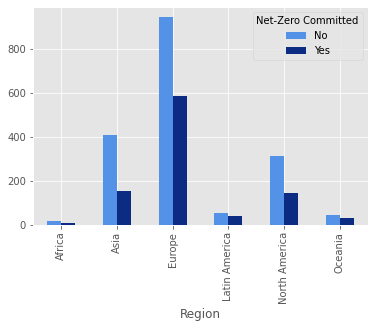

In [33]:
regnet= data.groupby(['Region','Net-Zero Committed'])['Company Name'].count().unstack()
regnet.plot(kind= "bar", color= ['#5492E8','#0c2c84'])


### **Conclusions**



*   Since 2015 there has been an increasing interest from companies around the world in setting SBTs and it is expected this number continue growing during this decade.
*  Most larger companies are setting and committing SBTs compared to SMEs and Financial Institutions. 
*   Participation of SMEs is key to reduce GHG in the supply chain, it is necessary to increase their participation in all regions.
*   Most companies setting targets are aligned with the 1.5C scenario, with the majority of scope 1 and scope 2 targets. 
*   It is still needed that companies increase ambition and try to achieve Net-Zero by 2050. 
*   The smaller number of companies setting targets come from Latam and Africa. It is necessary to strenght capacities in these regions to support companies in setting SBTs. 
   



##**References** 

Science-Based Target initiative (SBTI), https://sciencebasedtargets.org

SME Climate Hub, https://smeclimatehub.org

Author: Irais Saldivar

www.linkedin.com/in/irais-saldivar